In [1]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/bking/Projects/poetry/diplomacy_gif_maker/diplomacy_gif_maker/scripts')
import os
import pandas as pd
import numpy as np
import analysisFunctions as aF

In [2]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(os.path.abspath(''))))
csv_data_path = os.path.join(BASE_DIR, 'diplomacy_gif_maker/csv')
reference_data_path = os.path.join(BASE_DIR, 'diplomacy_gif_maker/csv/reference_data')
summary_data_path = os.path.join(BASE_DIR, 'diplomacy_gif_maker/csv/summary_data')
plots_path = os.path.join(BASE_DIR, 'diplomacy_gif_maker/images/plots')

In [3]:
unitChangeCount_df = pd.read_csv(csv_data_path + "/unitChangeCount_full.csv")
unitsByPlayer_df = pd.read_csv(csv_data_path + "/unitsByPlayer_full.csv")
orders_df = pd.read_csv(csv_data_path + "/orders_full.csv")

In [4]:
def get_number_of_seasons(current_year: int, current_season: str):
    number_of_years = current_year - 1901
    base_number = number_of_years*3
    if current_season=="spring":
        number_of_urls = base_number + 1
    elif current_season=="fall":
        number_of_urls = base_number + 2
    else:
        number_of_urls = base_number + 3
    return number_of_urls
num_seasons = get_number_of_seasons(1921, 'fall')

In [5]:
unitsByPlayer_df['unit_type'][17]

'F'

In [6]:
unitsByPlayer_df.unit_type.replace(["{'type': 'F', 'coast': 'sc'}", "{'type': 'F', 'coast': 'nc'}"], ['F', 'F'], inplace=True)

In [7]:
unitsByPlayer_df.to_csv(csv_data_path + "/unitsByPlayer_full.csv")

In [8]:
country_year_df = pd.DataFrame(unitsByPlayer_df.groupby(['country']).year.value_counts())
country_season_df = pd.DataFrame(unitsByPlayer_df.groupby(['country', 'year', 'season_number']).season.value_counts())

In [9]:
country_season_df

season
country year season_number season        
Austria 1901 1             spring       3
             2             fall         3
             3             winter       3
        1902 4             spring       5
             5             fall         5
...                                   ...
Turkey  1920 59            fall        14
             60            winter      14
        1921 61            spring      15
             62            fall        15
             63            winter      15

[334 rows x 1 columns]

In [10]:
country_year_df.index = country_year_df.index.rename(['country', 'years'])
country_season_df.index = country_season_df.index.rename(['country', 'year', 'season_number', 'seasons'])

In [11]:
country_year_df_sorted = country_year_df.sort_values(by=['country', 'years'])
country_season_df_sorted = country_season_df.sort_values(by=['country', 'year'])
country_year_df_sorted = country_year_df_sorted.reset_index(level=[0,1])
country_season_df_sorted = country_season_df_sorted.reset_index(level=[0,1,2,3])
country_year_df_sorted.columns = ['country', 'year', 'units']
country_season_df_sorted.columns = ['country', 'year', 'season_number','season', 'units']

In [12]:
country_season_df_sorted

,country,year,season_number,season,units
0,Austria,1901,1,spring,3
1,Austria,1901,2,fall,3
2,Austria,1901,3,winter,3
3,Austria,1902,4,spring,5
4,Austria,1902,5,fall,5
...,...,...,...,...,...
329,Turkey,1920,59,fall,14
330,Turkey,1920,60,winter,14
331,Turkey,1921,61,spring,15
332,Turkey,1921,62,fall,15


In [13]:
country_year_df_sorted.to_csv(csv_data_path + "/temp/country_year_df.csv")
country_season_df_sorted.to_csv(csv_data_path + "/temp/country_season_units_df.csv")

In [14]:
total_years = max(unitsByPlayer_df['year'])

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [16]:
# Palettes
country_palette={
      'Austria':(0.941176470588,0.0,0.0), 
      'England':(0.0,0.0,0.66667),
      'France':(.6,.6,1.0),
      'Germany':(0.0,0.0,0.0),
      'Italy':(0.0,0.66667,0.0),
      'Russia':(0.733333333333,0.0,0.733333333333),
      'Turkey':(0.733333333333,0.733333333333,0.0),
    }

order_palette={
      'MOVE':(0.7,0.7,0.6), 
      'SUPPORT':(0.196078431373,0.588235294118,0.392156862745),
      'HOLD':(0,0,0),
      'DISBAND':(1.0,0.66,0.04),
      'BUILD':(0.5,0.05,0.95),
      'DESTROYED':(0.996078431373,0.0313725490196,0.0313725490196),
        'CONVOY':(0.14,0.52,0.78)
    }

In [17]:
print(country_season_df_sorted.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        334 non-null    object
 1   year           334 non-null    int64 
 2   season_number  334 non-null    int64 
 3   season         334 non-null    object
 4   units          334 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 13.2+ KB
None


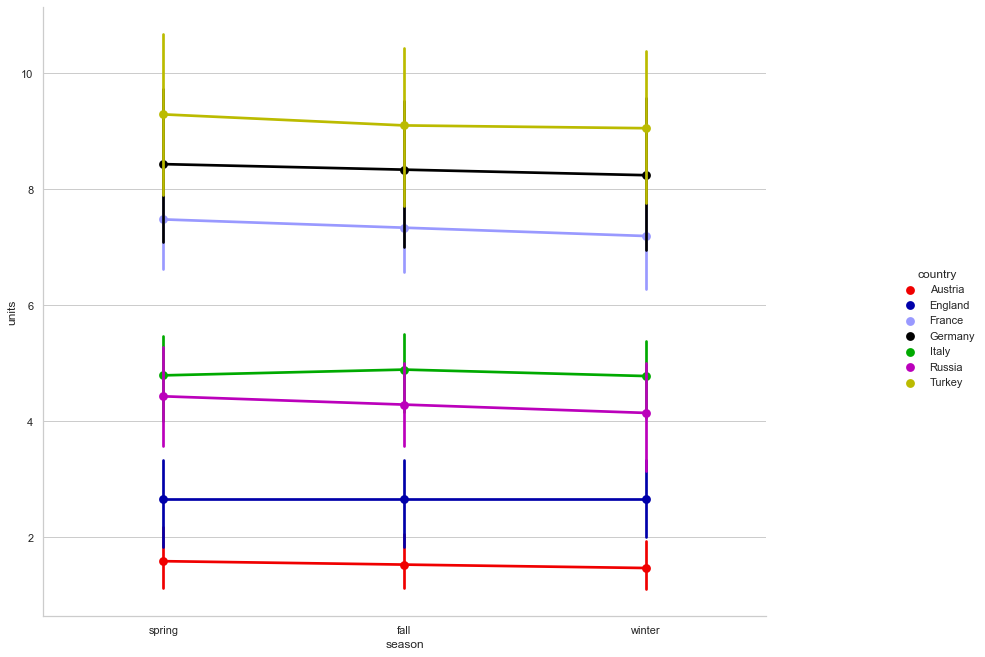

In [18]:
# plt.figure(figsize=(200, 6))
# plt.subplots(figsize=(20,15))
g=sns.catplot(x="season", y="units", hue="country", kind="point", data=country_season_df_sorted, palette=country_palette)
g.fig.set_size_inches(15,10)

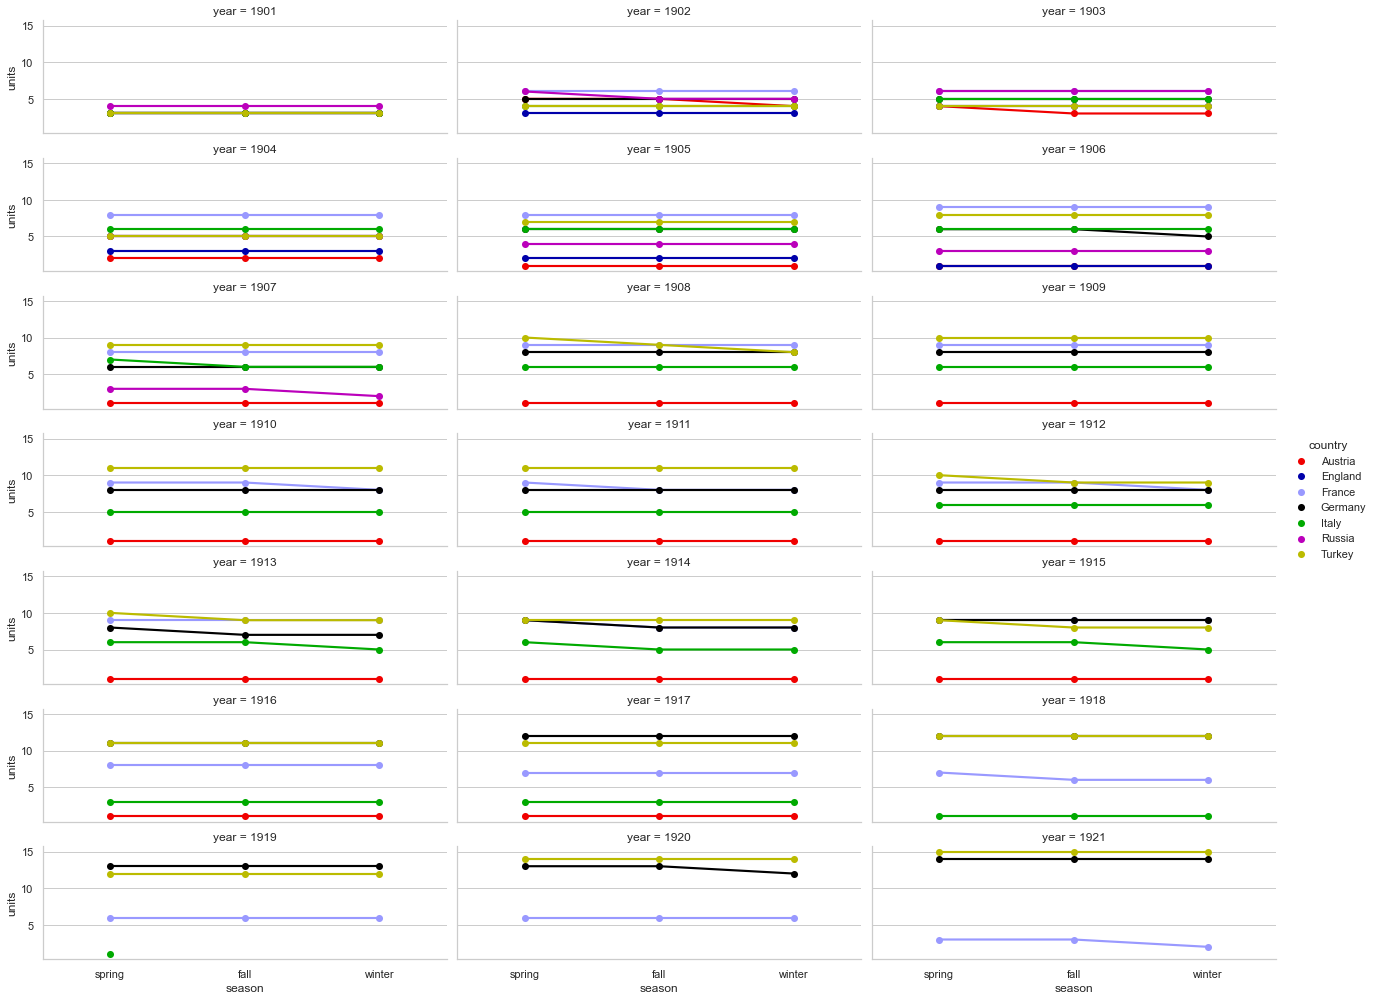

In [19]:
units_by_year_plot = sns.catplot(x="season", y="units", hue="country", order=['spring', 'fall', 'winter'], col="year",
               col_wrap=3, height=2, aspect=3, scale=.8,
               data=country_season_df_sorted, kind="point", palette=country_palette)
units_by_year_fig = units_by_year_plot.savefig(plots_path + "/unitsByYear.png")
# units_by_year_fig.savefig(plots_path + "/unitsByYear.png")

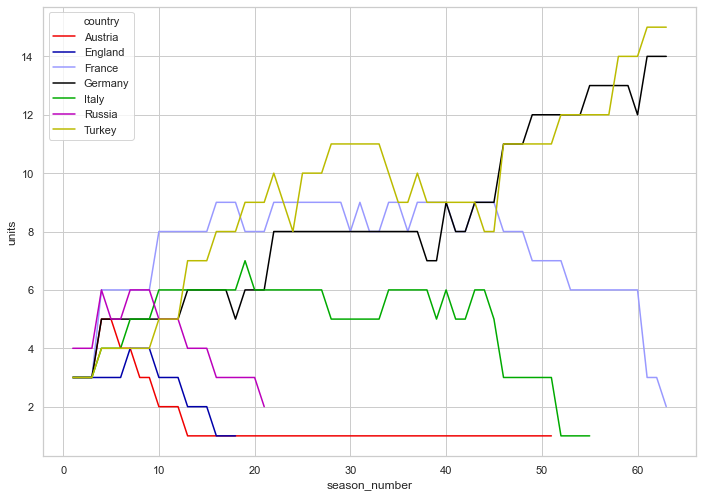

In [20]:
sns_plot = sns.lineplot(x="season_number", y="units", hue="country", 
                  data=country_season_df_sorted, palette=country_palette)
fig = sns_plot.get_figure()
fig.savefig(plots_path + "/unitsByCountry.png")

In [21]:
# Metrics
# territories taken - territories taken from
# foreign territories supported - territories supported by foreign players
# most sedentary (when an army didn’t move) - most mobile
# sea master (most fleets) - (most armies) - (most convoys?)
# first to 10 SCs?
# 12:16
# most builds, most disbands

In [22]:
orders_df

,Unnamed: 0,country,type,actingUnit,unitFrom,unitTo,result,result_reason,year,season,season_number,unitType,retreat_flag,retreat_to,retreat_type,retreat_result,destroyed_flag
0,0,Turkey,MOVE,Ank,NaN,BLA,FAILS,Attack strength is not greater than the preven...,1901,spring,1,NaN,0,NaN,NaN,NaN,0
1,1,Turkey,MOVE,Smy,NaN,Lon,FAILS,Invalid move path,1901,spring,1,NaN,0,NaN,NaN,NaN,0
2,2,Turkey,MOVE,Con,NaN,Bul,SUCCEEDS,Attack strength is greater,1901,spring,1,NaN,0,NaN,NaN,NaN,0
3,3,Italy,HOLD,Ven,NaN,NaN,SUCCEEDS,Unchallenged,1901,spring,1,NaN,0,NaN,NaN,NaN,0
4,4,Italy,MOVE,Nap,NaN,ION,SUCCEEDS,Attack strength is greater,1901,spring,1,NaN,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1450,Germany,HOLD,War,NaN,NaN,SUCCEEDS,Stronger defense,1921,fall,62,NaN,0,NaN,NaN,NaN,0
1451,1451,Germany,SUPPORT,Sil,War,NaN,SUCCEEDS,Unchallenged,1921,fall,62,NaN,0,NaN,NaN,NaN,0
1452,1452,France,MOVE,SKA,NaN,Nwy,FAILS,Attack strength is not greater than the defend...,1921,fall,62,NaN,0,NaN,NaN,NaN,0
1453,1453,France,MOVE,Mar,NaN,Bur,FAILS,Attack strength is not greater than the defend...,1921,fall,62,NaN,1,NaN,DISBAND,SUCCEEDS,1


In [23]:
# Number of turns per country (for normalization)
new_df = orders_df.groupby(['country','year', 'season']).size().reset_index().rename(columns={0:'count'})
num_turns_df = new_df.groupby(['country']).size().reset_index().rename(columns={0:'number_of_turns'})
num_turns_df.to_csv(summary_data_path + '/country_num_turns.csv')

In [24]:
# Number of orders per country (for normalization)
num_orders_df = orders_df.groupby(['country']).size().reset_index().rename(columns={0:'number_of_orders'})
num_orders_df.to_csv(summary_data_path + '/country_num_orders.csv')

In [25]:
# Most successful / unsuccessful country
country_order_results = pd.DataFrame(orders_df.groupby(['country']).result.value_counts())
country_order_results.index = country_order_results.index.rename(['country', 'result_item'])
country_order_results_reset = country_order_results.reset_index(level=[0,1])
country_success_ratios = aF.results_ratio(country_order_results_reset)
country_success_ratios.to_csv(summary_data_path + '/country_success_fail_ratios.csv')

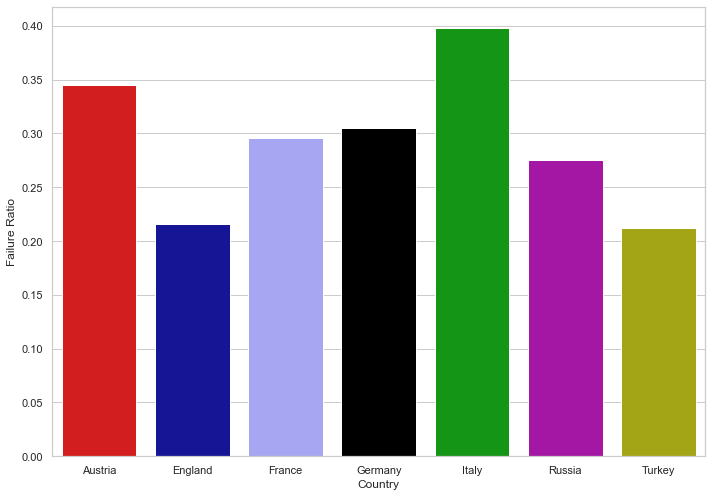

In [26]:
# Success / fail ratios
fail_sns_plot = sns.barplot(x="country", y="failure_ratio",
                  data=country_success_ratios, palette=country_palette)
fail_sns_plot.set(xlabel='Country', ylabel='Failure Ratio')

failure_fig = fail_sns_plot.get_figure()
failure_fig.savefig(plots_path + "/failureRatioByCountry.png")

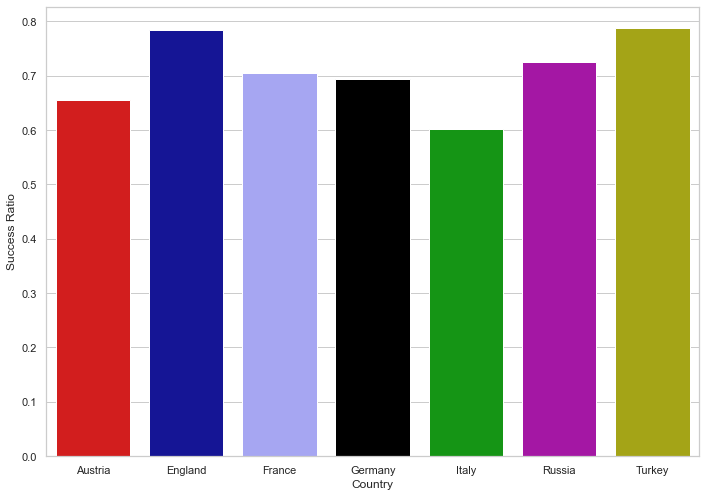

In [27]:
# Success / fail ratios
success_sns_plot = sns.barplot(x="country", y="success_ratio",
                  data=country_success_ratios, palette=country_palette)
success_sns_plot.set(xlabel='Country', ylabel='Success Ratio')

success_fig = success_sns_plot.get_figure()
success_fig.savefig(plots_path + "/successRatioByCountry.png")

In [28]:
# most builds, most disbands
country_order_type = pd.DataFrame(orders_df.groupby(['country']).type.value_counts())
country_order_type.index = country_order_type.index.rename(['country', 'type_item'])
country_order_type_reset = country_order_type.reset_index(level=[0,1])
country_order_type_reset.to_csv(summary_data_path + '/country_order_type_counts.csv')

In [29]:
country_order_type_normd = country_order_type_reset.set_index('country').join(num_orders_df.set_index('country'))
country_order_type_normd['normalized'] = country_order_type_normd['type']/country_order_type_normd['number_of_orders']
country_order_type_normd = country_order_type_normd.reset_index()

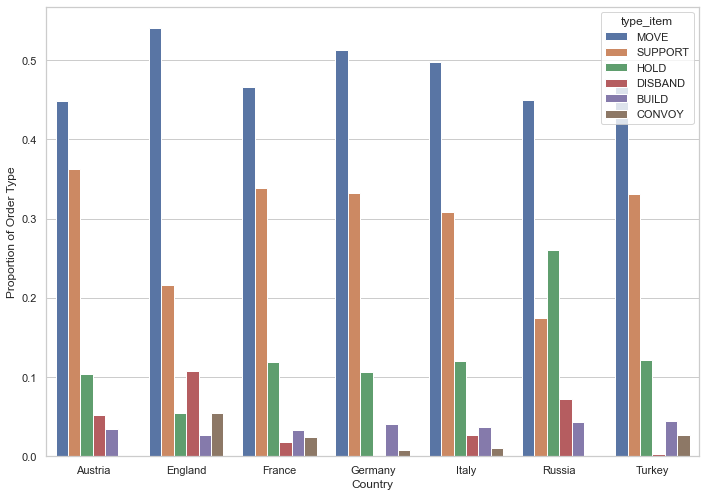

In [30]:
sns.set(style="whitegrid")
sns_plot = sns.barplot(x="country", y="normalized", hue="type_item", 
                  data=country_order_type_normd)
sns_plot.set(xlabel='Country', ylabel='Proportion of Order Type')

fig = sns_plot.get_figure()
fig.savefig(plots_path + "/orderProportionByCountry.png")

In [31]:
mask = (orders_df['destroyed_flag'] == 1)
orders_df_wDestroyed = orders_df
orders_df_wDestroyed['type'][mask] = 'DESTROYED'
orders_df_wDestroyed
country_order_type_wDestroyed = pd.DataFrame(orders_df_wDestroyed.groupby(['country']).type.value_counts())
country_order_type_wDestroyed.index = country_order_type_wDestroyed.index.rename(['country', 'type_item'])
country_order_type_wDestroyed_reset = country_order_type_wDestroyed.reset_index(level=[0,1])
country_order_type_wDestroyed_reset.to_csv(summary_data_path + '/country_order_type_counts_wDestroyed.csv')

/home/bking/.cache/pypoetry/virtualenvs/diplomacy-gif-maker-dQ5Phzro-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
country_order_type_normd_wDestroyed = country_order_type_wDestroyed_reset.set_index('country').join(num_orders_df.set_index('country'))
country_order_type_normd_wDestroyed['normalized'] = country_order_type_normd_wDestroyed['type']/country_order_type_normd_wDestroyed['number_of_orders']
country_order_type_normd_wDestroyed = country_order_type_normd_wDestroyed.reset_index()

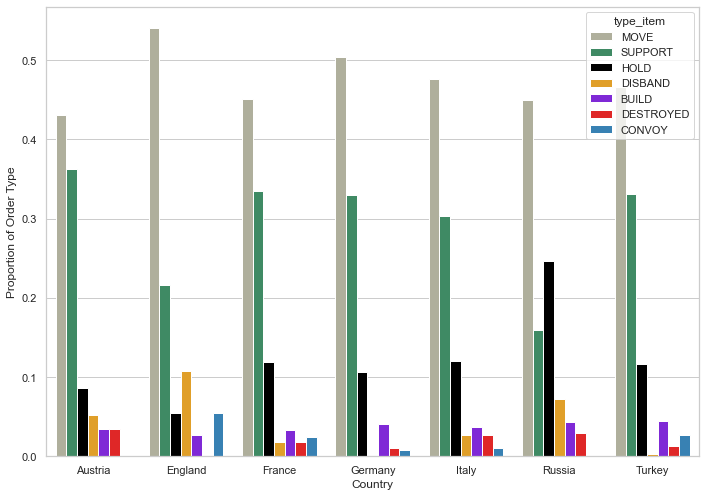

In [33]:
sns_plot = sns.barplot(x="country", y="normalized", hue="type_item", 
                  data=country_order_type_normd_wDestroyed, palette=order_palette)
sns_plot.set(xlabel='Country', ylabel='Proportion of Order Type')

fig = sns_plot.get_figure()
fig.savefig(plots_path + "/orderProportionByCountry_wDestroyed.png")

In [34]:
retreats_df = orders_df.groupby(['country']).sum().reset_index()

In [35]:
retreats_df

,country,Unnamed: 0,year,season_number,retreat_flag,destroyed_flag
0,Austria,23747,110575,1045,6,2
1,England,6566,70418,306,1,0
2,France,237336,626748,10176,11,6
3,Germany,320240,702079,13808,14,4
4,Italy,114532,364647,4971,12,5
5,Russia,15530,131354,670,9,2
6,Turkey,339834,774656,14887,9,5


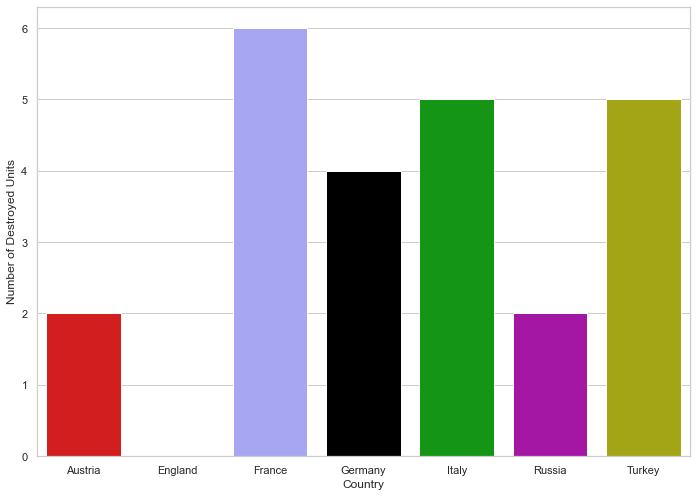

In [36]:
sns_plot = sns.barplot(x="country", y="destroyed_flag", 
                  data=retreats_df, palette=country_palette)
sns_plot.set(xlabel='Country', ylabel='Number of Destroyed Units')

fig = sns_plot.get_figure()
fig.savefig(plots_path + "/destroyedByCountry.png")

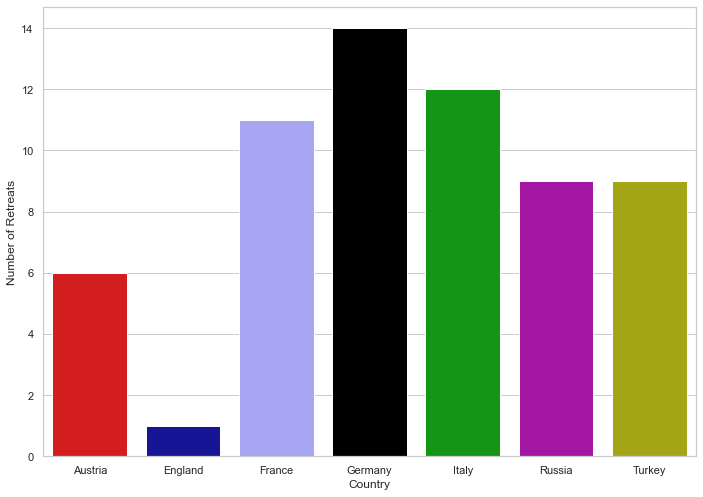

In [37]:
sns_plot = sns.barplot(x="country", y="retreat_flag", 
                  data=retreats_df, palette=country_palette)
sns_plot.set(xlabel='Country', ylabel='Number of Retreats')

fig = sns_plot.get_figure()
fig.savefig(plots_path + "/retreatsByCountry.png")

In [38]:
unitsByPlayer_df
# orders_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,country,territory,unit_type,year,season,season_number
0,0,0,0,0,0,0,0,0,Austria,Bud,A,1901,spring,1
1,1,1,1,1,1,1,1,1,Austria,Tri,F,1901,spring,1
2,2,2,2,2,2,2,2,2,Austria,Vie,A,1901,spring,1
3,3,3,3,3,3,3,3,3,England,Edi,F,1901,spring,1
4,4,4,4,4,4,4,4,4,England,Lon,F,1901,spring,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2039,2039,2039,2039,2039,2039,2039,2039,Turkey,Tun,F,1921,winter,63
2040,2040,2040,2040,2040,2040,2040,2040,2040,Turkey,Tyr,A,1921,winter,63
2041,2041,2041,2041,2041,2041,2041,2041,2041,Turkey,TYS,F,1921,winter,63
2042,2042,2042,2042,2042,2042,2042,2042,2042,Turkey,Ukr,A,1921,winter,63


In [39]:
territories_owned_by_country_per_season = unitsByPlayer_df.groupby(['country', 'year', 'season'])['territory'].apply(list)
territories_owned_by_country_per_season = territories_owned_by_country_per_season.reset_index(level=[0,1,2])
territories_owned_by_country_per_season.to_csv(summary_data_path + '/territories_owned_by_country_per_season.csv')

In [41]:
territories_owned_by_country_per_season

,country,year,season,territory
0,Austria,1901,fall,"[Alb, Ser, Vie]"
1,Austria,1901,spring,"[Bud, Tri, Vie]"
2,Austria,1901,winter,"[Gre, Ser, Vie]"
3,Austria,1902,fall,"[Alb, Bud, Gal, Gre, Ser]"
4,Austria,1902,spring,"[Bud, Gre, Ser, Tri, Vie]"
...,...,...,...,...
329,Turkey,1920,spring,"[Bud, Con, Gre, LYO, MAO, Nap, Pie, Rom, Rum, ..."
330,Turkey,1920,winter,"[AEG, Bud, Gal, Gre, ION, MAO, Pie, Por, Rum, ..."
331,Turkey,1921,fall,"[AEG, Boh, Gal, Gre, ION, LYO, MAO, Pie, Rum, ..."
332,Turkey,1921,spring,"[AEG, Bud, Con, Gal, Gre, ION, MAO, Pie, Por, ..."


In [42]:
orders_df

,Unnamed: 0,country,type,actingUnit,unitFrom,unitTo,result,result_reason,year,season,season_number,unitType,retreat_flag,retreat_to,retreat_type,retreat_result,destroyed_flag
0,0,Turkey,MOVE,Ank,NaN,BLA,FAILS,Attack strength is not greater than the preven...,1901,spring,1,NaN,0,NaN,NaN,NaN,0
1,1,Turkey,MOVE,Smy,NaN,Lon,FAILS,Invalid move path,1901,spring,1,NaN,0,NaN,NaN,NaN,0
2,2,Turkey,MOVE,Con,NaN,Bul,SUCCEEDS,Attack strength is greater,1901,spring,1,NaN,0,NaN,NaN,NaN,0
3,3,Italy,HOLD,Ven,NaN,NaN,SUCCEEDS,Unchallenged,1901,spring,1,NaN,0,NaN,NaN,NaN,0
4,4,Italy,MOVE,Nap,NaN,ION,SUCCEEDS,Attack strength is greater,1901,spring,1,NaN,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1450,Germany,HOLD,War,NaN,NaN,SUCCEEDS,Stronger defense,1921,fall,62,NaN,0,NaN,NaN,NaN,0
1451,1451,Germany,SUPPORT,Sil,War,NaN,SUCCEEDS,Unchallenged,1921,fall,62,NaN,0,NaN,NaN,NaN,0
1452,1452,France,MOVE,SKA,NaN,Nwy,FAILS,Attack strength is not greater than the defend...,1921,fall,62,NaN,0,NaN,NaN,NaN,0
1453,1453,France,DESTROYED,Mar,NaN,Bur,FAILS,Attack strength is not greater than the defend...,1921,fall,62,NaN,1,NaN,DISBAND,SUCCEEDS,1
